In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import sklearn.cluster

Load data:

In [3]:
data = pd.read_csv('gender_set_normal.csv', header=0, sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9378 entries, 0 to 9377
Data columns (total 8 columns):
followers_count    9378 non-null float64
post_count         9378 non-null float64
like_count         9378 non-null float64
friends_count      9378 non-null float64
posts_count        9378 non-null float64
reposts_count      9378 non-null float64
videos_count       9378 non-null float64
photos_count       9378 non-null float64
dtypes: float64(8)
memory usage: 586.2 KB


In [4]:
data_array=np.array(data.values)

In [5]:
#data.hist(bins=100, figsize=(20,15))

In [6]:
kmeans = sklearn.cluster.KMeans(n_clusters=2)
kmeans.fit(data_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.06735239 0.77492008 0.19433487 0.06784666 0.05329234 0.39685326
  0.10568408 0.15570371]
 [0.14746208 0.31791697 0.35283143 0.13026184 0.05691179 0.14750426
  0.24598227 0.49941666]]


In [8]:
data['gender']=kmeans.labels_

In [9]:
labels=kmeans.labels_

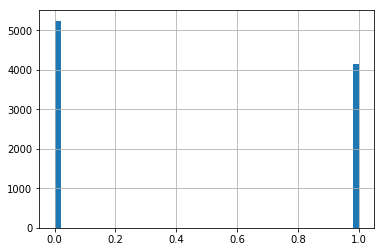

In [10]:
data['gender'].hist(bins=50)

In [11]:
print('0 = ', len(data.loc[data['gender'] == 0])/len(data)*100, '%')
print('1 = ', len(data.loc[data['gender'] == 1])/len(data)*100, '%')

0 =  55.90744295158883 %
1 =  44.09255704841117 %


c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


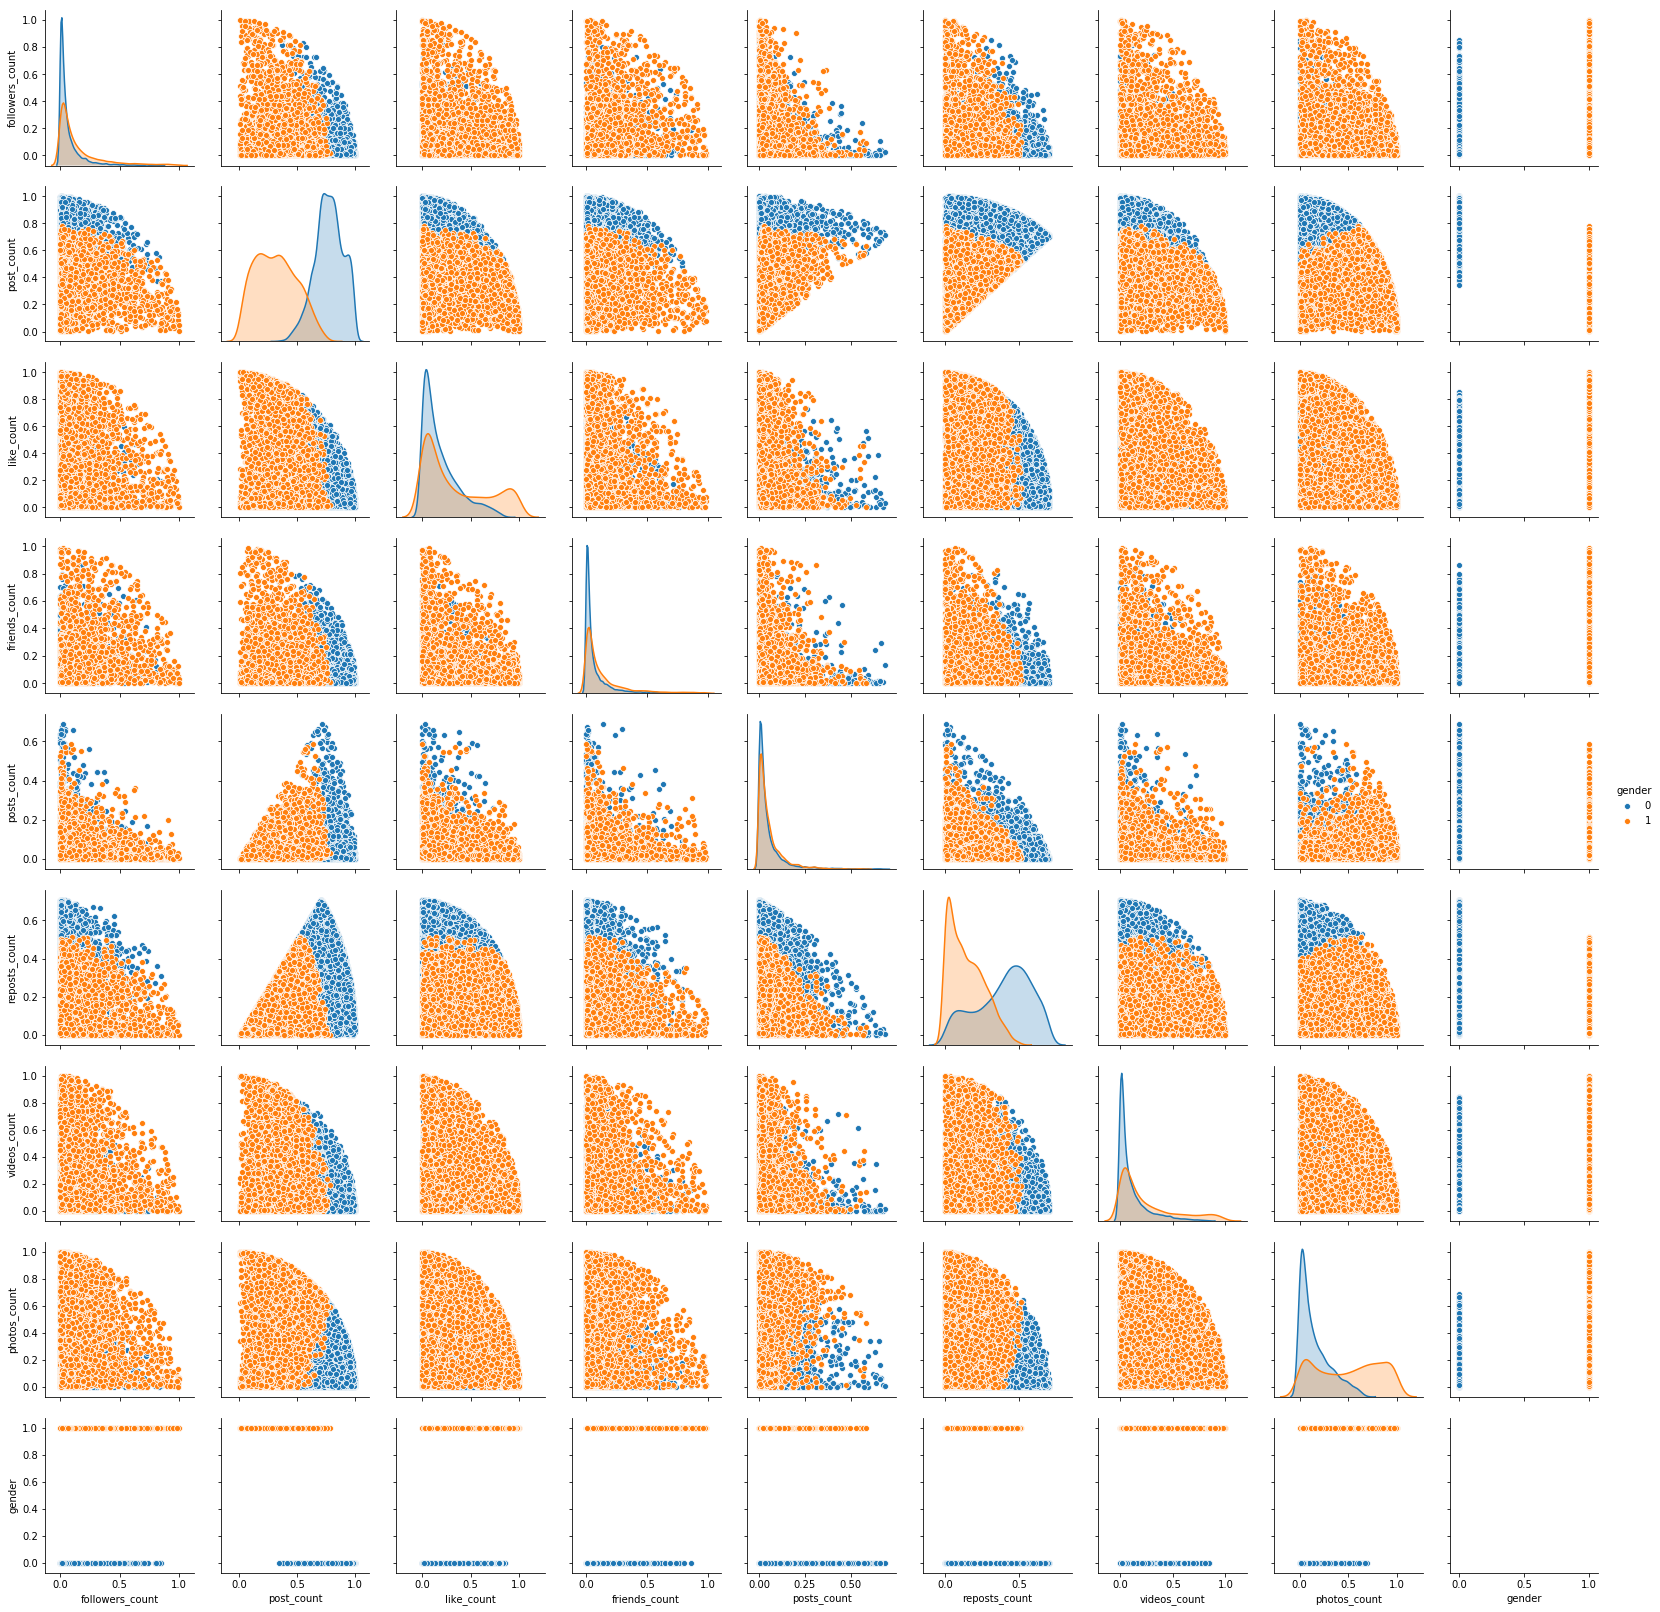

In [12]:
seaborn.pairplot(data,hue="gender", diag_kind="kde")

In [13]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
dist = 1 - cosine_similarity(data_array)

In [15]:
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(9378, 2)

In [16]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

In [17]:
colors = {0: 'red',
          1: 'blue' }
names = {0: 'men', 
         1: 'women' }

In [18]:
df = pd.DataFrame({'x': x, 'y':y, 'gender':labels}) 
groups = df.groupby('gender')

c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
c

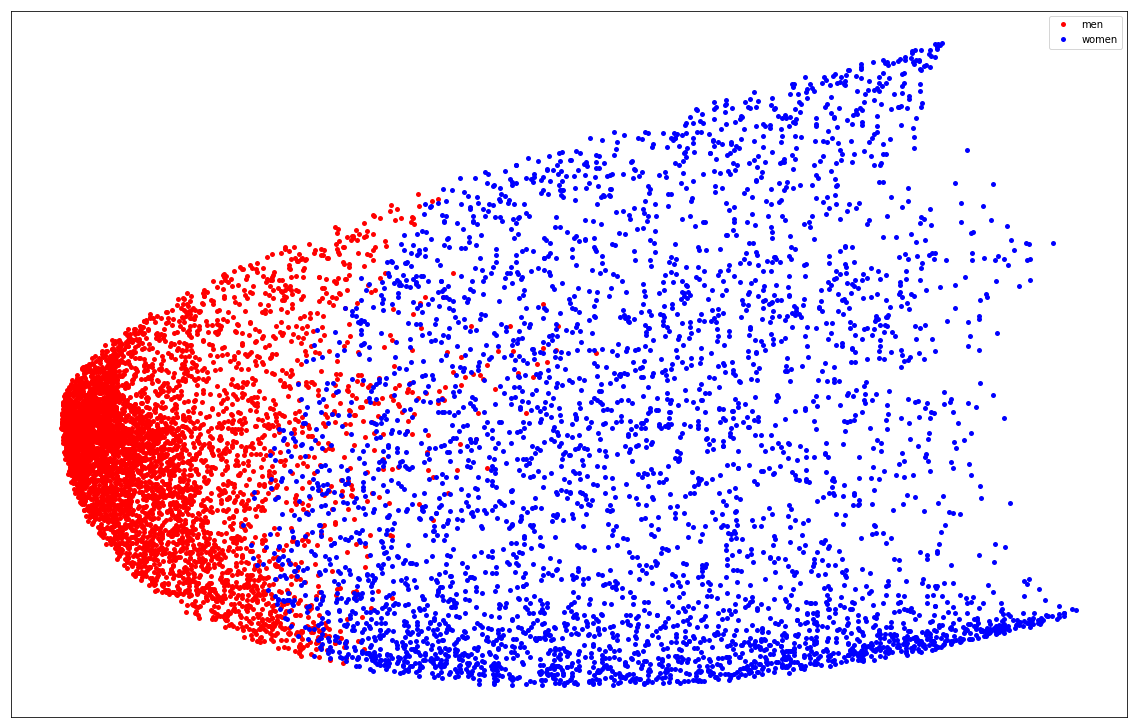

In [19]:
fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()

plt.show()

In [20]:
from sklearn import metrics

In [22]:
sil_coeff = sklearn.metrics.silhouette_score(data_array, labels, metric='euclidean')
dav_bould_score = sklearn.metrics.davies_bouldin_score(data_array, labels)
 

print('The Silhouette Coefficient is ',sil_coeff)
print('The Davies-Bouldin score is ',dav_bould_score)


The Silhouette Coefficient is  0.3088810024150755
The Davies-Bouldin score is  1.4800961570103428


c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [ ]:
#import scipy.cluster.hierarchy as sch
#dendogram = sch.dendrogram(sch.linkage(data_array, method= 'ward', metric= 'euclidean'))